In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
from scipy.io import loadmat
from sklearn import svm

In [3]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)


In [4]:
# functions
def plotData(X, y ,S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)
    

In [5]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y,6)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths='5')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)


In [6]:
# exapmle 1 , Linear SVM

data1 = loadmat('/content/ex6data1.mat')
#print(data1)    

y1 = data1['y']
X1 = data1['X']



In [7]:
print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


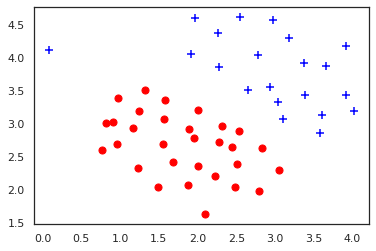

In [8]:
#data before classifying
plotData(X1,y1,50)


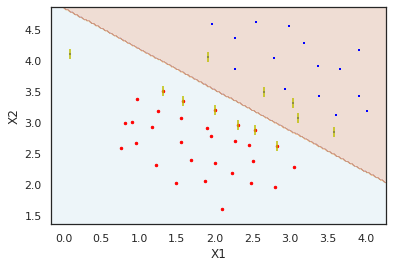

Number of support vectors:  12


In [9]:
# small C ==  UF
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

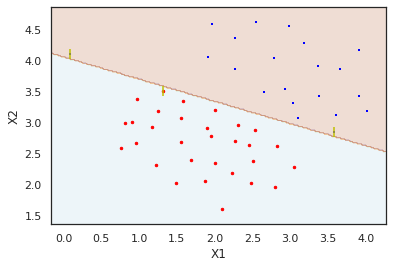

Number of support vectors:  3


In [10]:


# big C ==  OF
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

X2: (863, 2)
y2: (863, 1)


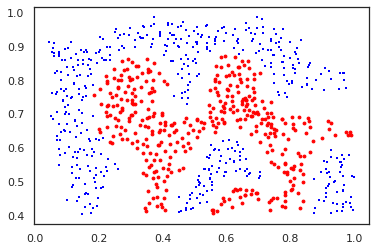

In [11]:
# Example 2  : Nonlinear SVM
   
data2 = loadmat('/content/ex6data2.mat')
#print(data2.keys())

y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)
#
plotData(X2, y2,8)
#---------------------------------------------------------
 

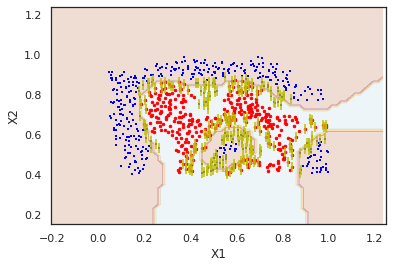

Number of support vectors:  254


In [12]:
#apply SVM
clf2 = svm.SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

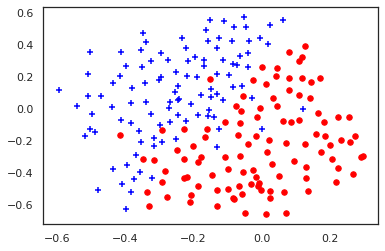

In [13]:
# Example 3  : Nonlinear SVM


data3 = loadmat('/content/ex6data3.mat')
#print(data3.keys())

y3 = data3['y']
X3 = data3['X']

#print('X3:', X3.shape)
#print('y3:', y3.shape)

plotData(X3, y3,30)




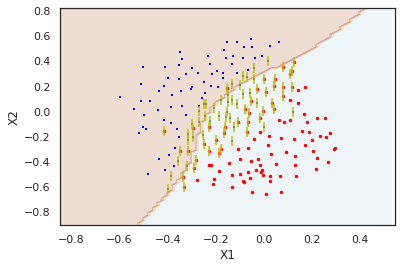

Number of support vectors:  78


In [14]:
#
clf3 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)
#---------------------------------------------------------
 

In [15]:
spam_test = loadmat('/content/spamTest.mat')
spam_train = loadmat('/content/spamTrain.mat')

X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()
#
print(X.shape, y.shape, Xtest.shape, ytest.shape)
#
svc = svm.SVC()
svc.fit(X, y)

# Testing
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))


(4000, 1899) (4000,) (1000, 1899) (1000,)
Test accuracy = 98.7%
